In [1]:
rm(list = ls())
set.seed(1234)
options(future.seed = TRUE)
Sys.setenv(RETICULATE_PYTHON = "/home/gonglihao/miniconda3/envs/42/bin/python")
suppressPackageStartupMessages({
    library("dplyr")
    library("Matrix")
    library("Seurat")
    library("future.apply")
    library("tictoc")
    library("ggplot2")
    library("ggpubr")
    library("future")
    library("COSG")
    library("harmony")
    library("parallel")
    library("patchwork")
})

plan("multicore", workers = 54)
options(future.globals.maxSize = Inf)
combined <- readRDS("/data3/Group8/gonglihao/1-p38/3-Annotation/anno-0.9.rds")

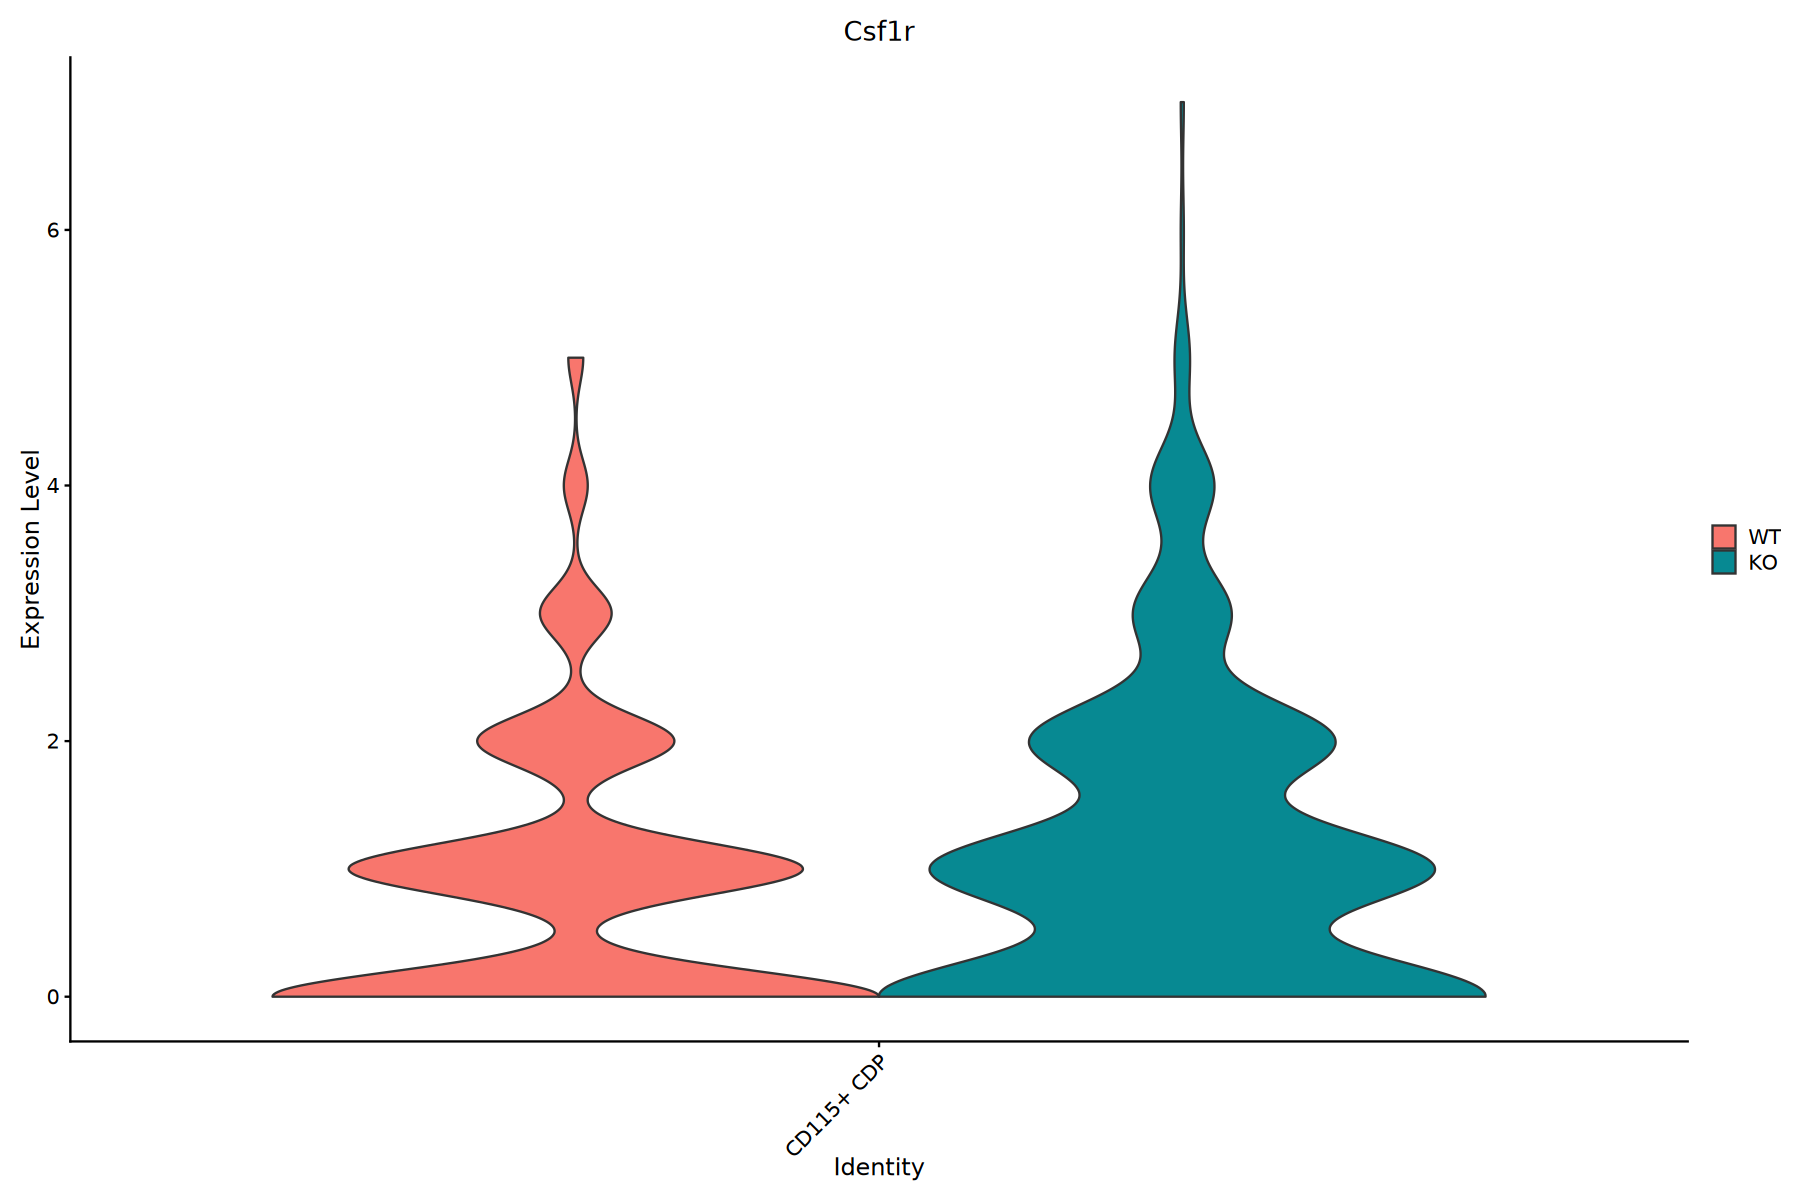

In [8]:
Idents(combined) <- "celltype"
combined$orig.ident <- factor(combined$orig.ident, levels = c("WT", "KO"))

# 创建小提琴图，WT将显示在KO之前
VlnPlot(combined,
        features = "Csf1r",
        idents = c("CD115+ CDP"),
        split.by = "orig.ident",
        assay = "RNA",
        slot = "counts",
        pt.size = 0)

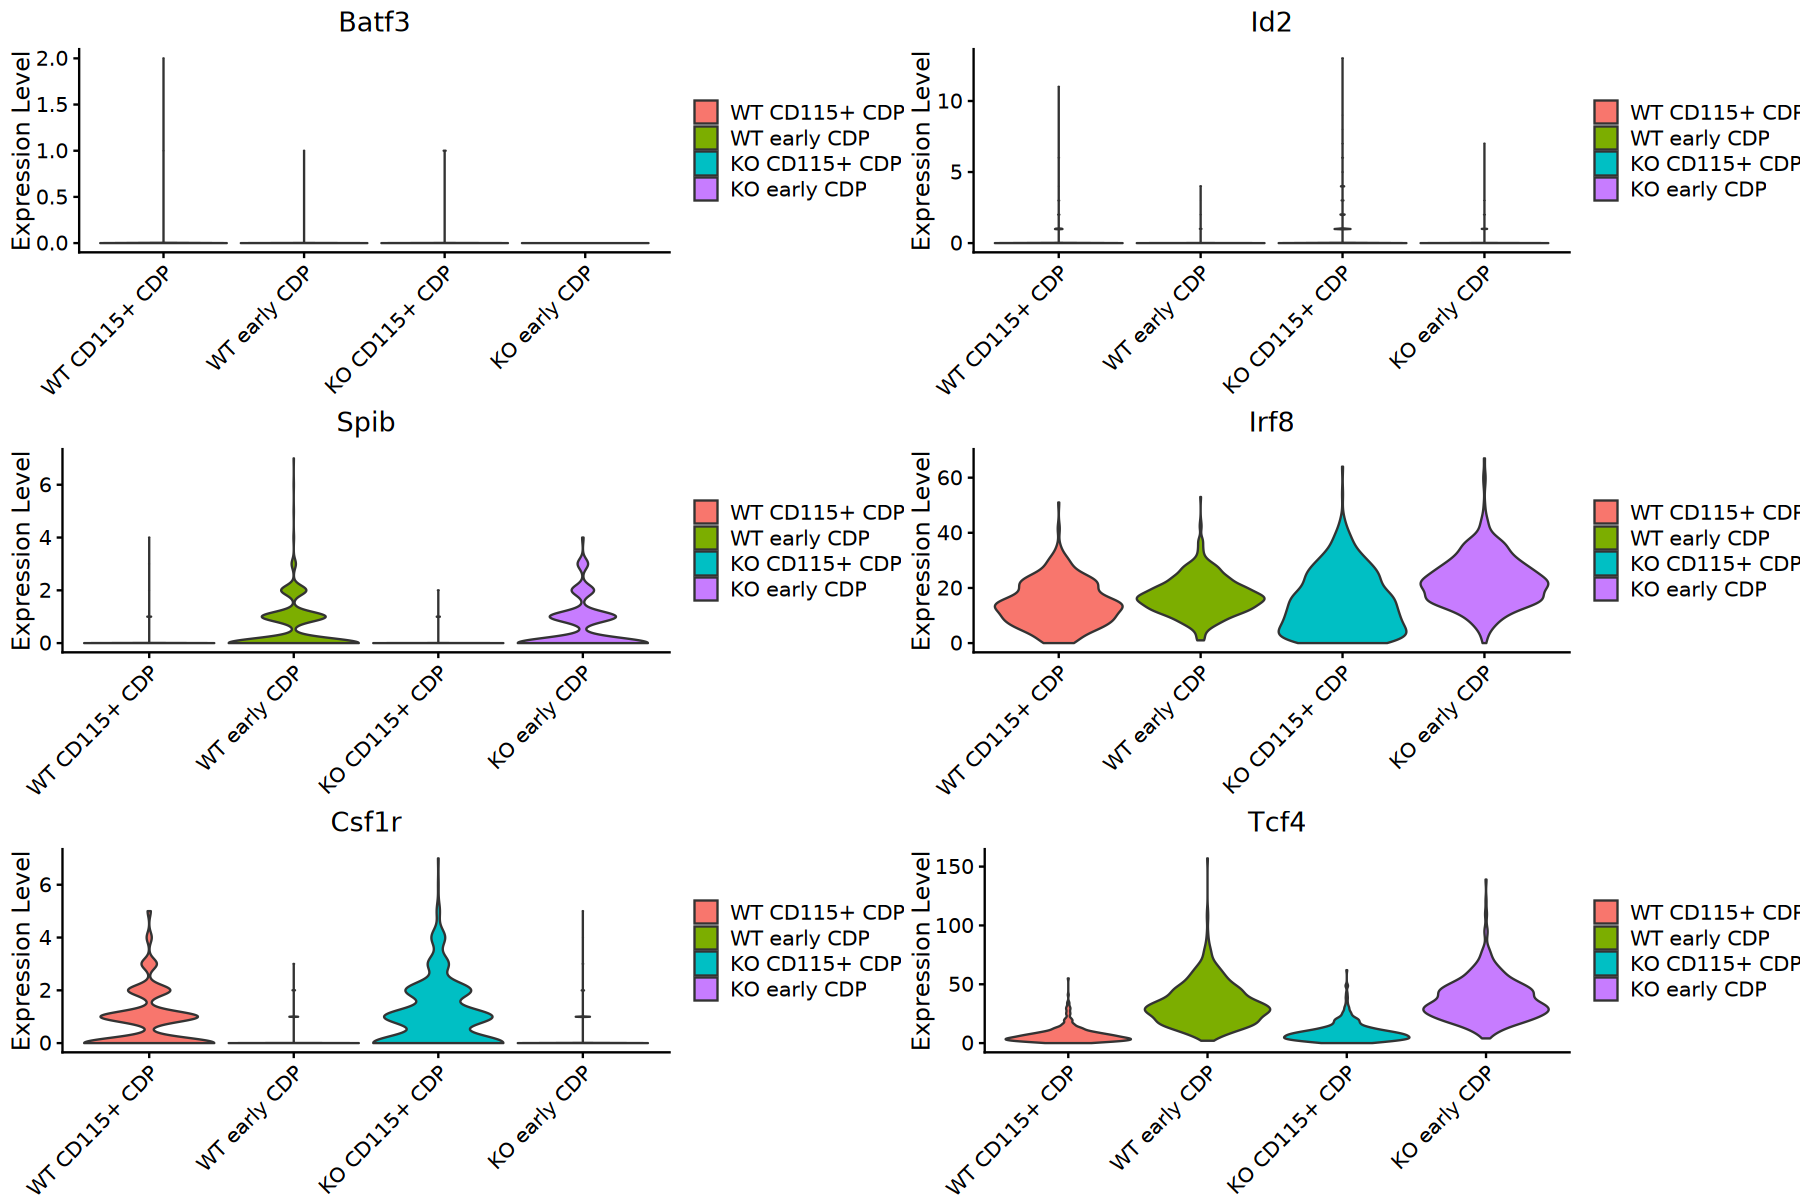

In [4]:
# 创建组合标签: orig.ident (WT/KO) + celltype (CD115+ CDP/early CDP)
combined$group <- paste(combined$orig.ident, combined$celltype, sep = " ")

# 设置小提琴图的显示顺序
group_levels <- c("WT CD115+ CDP", "WT early CDP", "KO CD115+ CDP", "KO early CDP")
combined$group <- factor(combined$group, levels = group_levels)

# 仅保留指定的四个组别的细胞
combined_subset <- subset(combined, cells = rownames(combined@meta.data)[combined$group %in% group_levels])

# 加载所需的包
library(ggplot2)
library(cowplot)
library(Seurat)

# 需要比较的基因列表
genes_to_plot <- c("Batf3", "Id2", "Spib", "Irf8", "Csf1r", "Tcf4")

# 创建一个空列表存储每个基因的小提琴图
plot_list <- list()

# 为每个基因创建小提琴图
for (i in seq_along(genes_to_plot)) {
  gene <- genes_to_plot[i]
  
  # 检查基因是否在数据集中
  if (gene %in% rownames(combined_subset)) {
    p <- VlnPlot(combined_subset, 
                features = gene, 
                group.by = "group",
                pt.size = 0,
                slot = "counts",
                combine = FALSE)[[1]] +
      theme(axis.title.x = element_blank(),
            axis.text.x = element_text(angle = 45, hjust = 1),
            plot.title = element_text(hjust = 0.5)) +
      xlab("")
    
    plot_list[[i]] <- p
  } else {
    cat(paste0("基因 ", gene, " 未在数据集中找到。\n"))
  }
}

options(repr.plot.width = 15, repr.plot.height = 10)
combined_plot <- plot_grid(plotlist = plot_list, ncol = 2)
print(combined_plot)

# 如果需要保存图像
# ggsave("gene_expression_comparison.pdf", combined_plot, width = 12, height = 10)

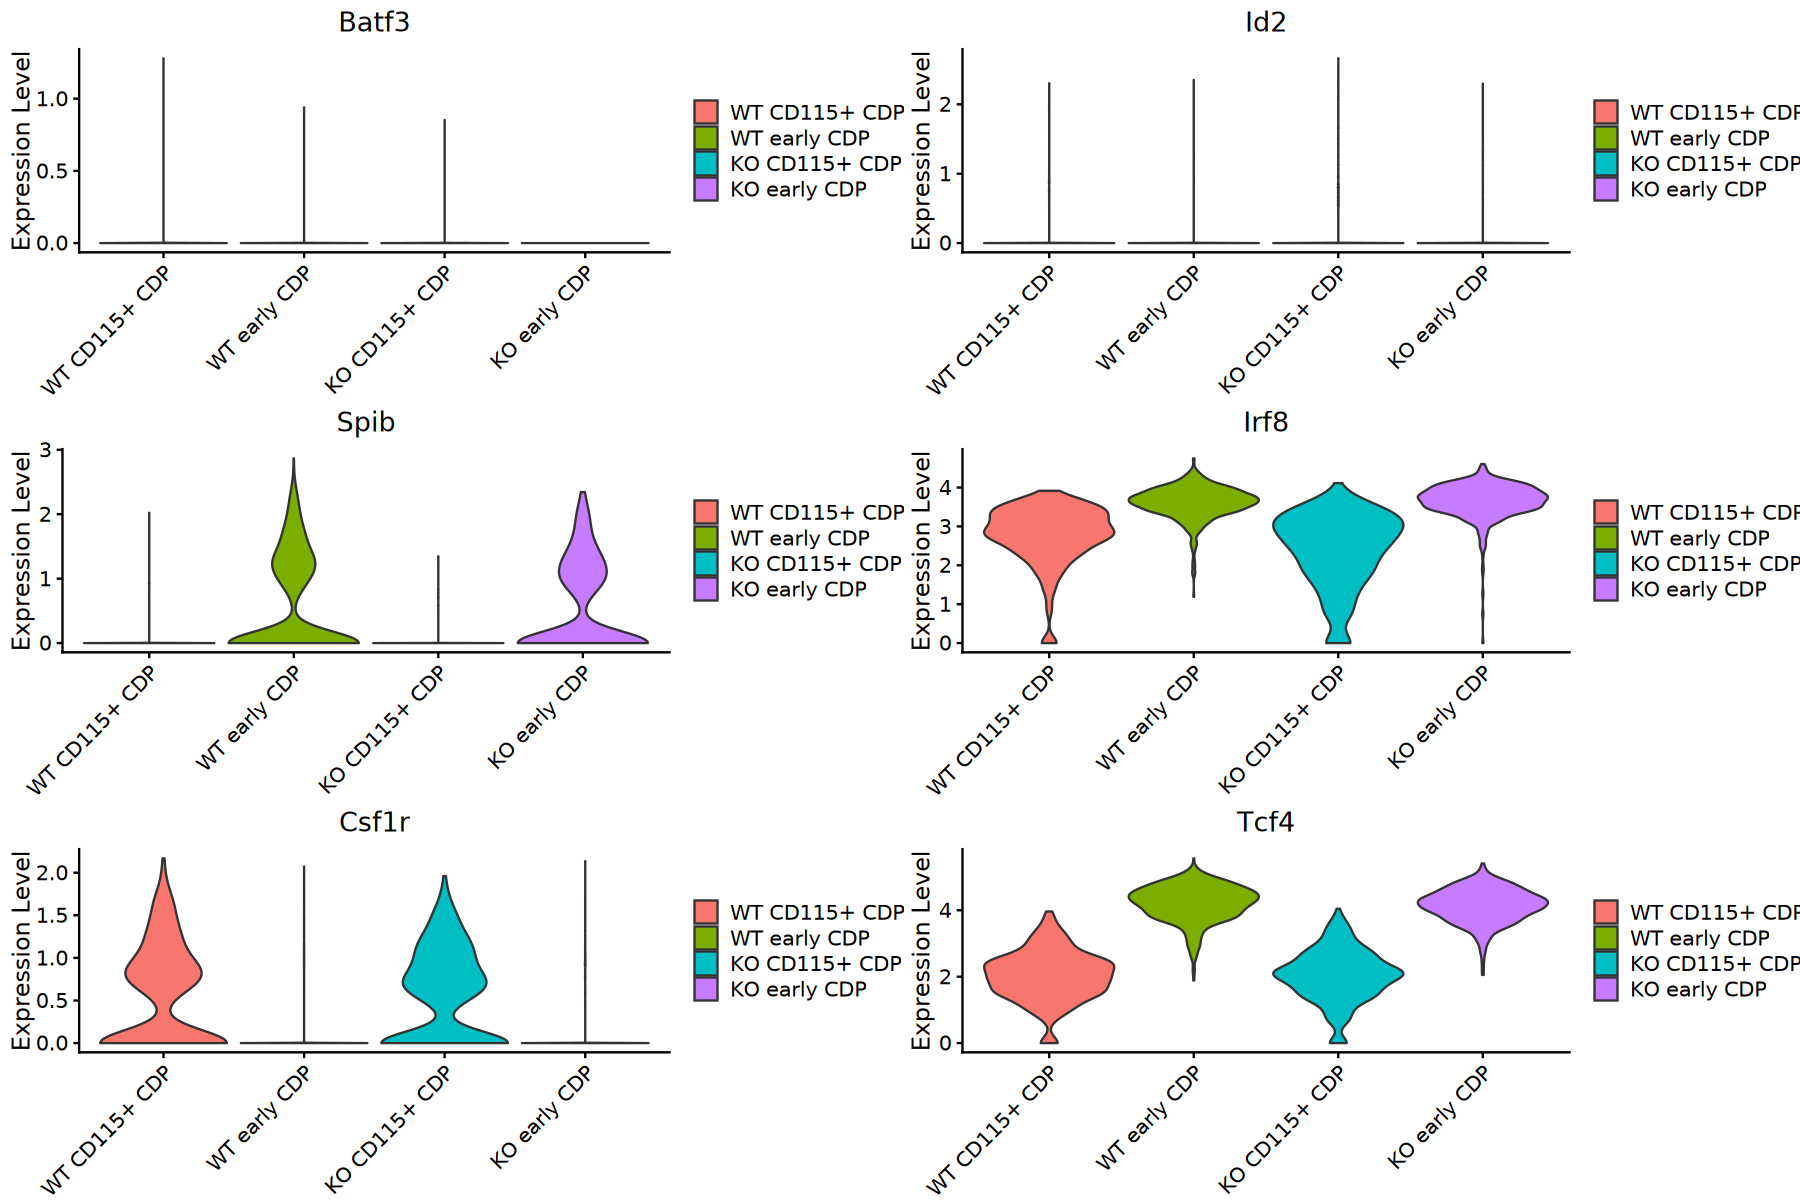

In [5]:
# 创建组合标签: orig.ident (WT/KO) + celltype (CD115+ CDP/early CDP)
combined$group <- paste(combined$orig.ident, combined$celltype, sep = " ")

# 设置小提琴图的显示顺序
group_levels <- c("WT CD115+ CDP", "WT early CDP", "KO CD115+ CDP", "KO early CDP")
combined$group <- factor(combined$group, levels = group_levels)

# 仅保留指定的四个组别的细胞
combined_subset <- subset(combined, cells = rownames(combined@meta.data)[combined$group %in% group_levels])

# 加载所需的包
library(ggplot2)
library(cowplot)
library(Seurat)

# 需要比较的基因列表
genes_to_plot <- c("Batf3", "Id2", "Spib", "Irf8", "Csf1r", "Tcf4")

# 创建一个空列表存储每个基因的小提琴图
plot_list <- list()

# 为每个基因创建小提琴图
for (i in seq_along(genes_to_plot)) {
  gene <- genes_to_plot[i]
  
  # 检查基因是否在数据集中
  if (gene %in% rownames(combined_subset)) {
    p <- VlnPlot(combined_subset, 
                features = gene, 
                group.by = "group",
                pt.size = 0,
                slot = "data",
                combine = FALSE)[[1]] +
      theme(axis.title.x = element_blank(),
            axis.text.x = element_text(angle = 45, hjust = 1),
            plot.title = element_text(hjust = 0.5)) +
      xlab("")
    
    plot_list[[i]] <- p
  } else {
    cat(paste0("基因 ", gene, " 未在数据集中找到。\n"))
  }
}

options(repr.plot.width = 15, repr.plot.height = 10)
combined_plot <- plot_grid(plotlist = plot_list, ncol = 2)
print(combined_plot)

# 如果需要保存图像
# ggsave("gene_expression_comparison.pdf", combined_plot, width = 12, height = 10)